In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 300

We will start with importing the csv file train.csv for the titanic dataset obtained from kaggle.com and begin inspection

In [125]:
df = pd.read_csv('train.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


I am immediately noting a few things that will need to be addressed.
1. The name column should be removed along with the ticket
2. We are missing a significant number of age values - will fix by imputing an average age
3. We are missing a vast number of cabin numbers. Likely that perhaps not everyone had cabins so perhaps whether someone has a cabin or not is a useful feature beyond just the cabin number
4. Missing 2 embarked locations so will need to asses if this column is important and either remove it or fill in the missing entries somehow
5. In terms of data format,  I know that we could change Pclass, sex and Cabin as categorical instead of integer. Not sure yet if that is something we want to do or stick with integer values. Either way we need to fix the Sex and cabin at the very least.
6. I wonder if we can combine the sibling/spouse and the parent/child columns together to create a characteristic description of the passenger's family. Perhaps as simple as combining them to create a number of family members.
We will tackle these one by one.

In [128]:
#Removing the names
df.drop(columns=['Name','Ticket'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


In [129]:
#convert sex to numbers 0 for male and 1 for female
sex_dict = {'male':0,
           'female':1}
df['Sex']=df['Sex'].map(sex_dict)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,NaN,S
2,1,1,1,38.0,1,0,71.2833,C85,C
3,1,3,1,26.0,0,0,7.9250,NaN,S
4,1,1,1,35.0,1,0,53.1000,C123,S
5,0,3,0,35.0,0,0,8.0500,NaN,S


In [130]:
#let us work on Cabin now. The numbers dont mean much so lets do 0 if no cabin an 1 if cabin number assigned

df['Cabin']=df['Cabin'].notnull().astype(int)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,S
2,1,1,1,38.0,1,0,71.2833,1,C
3,1,3,1,26.0,0,0,7.9250,0,S
4,1,1,1,35.0,1,0,53.1000,1,S
5,0,3,0,35.0,0,0,8.0500,0,S
6,0,3,0,NaN,0,0,8.4583,0,Q
7,0,1,0,54.0,0,0,51.8625,1,S
8,0,3,0,2.0,3,1,21.0750,0,S
9,1,3,1,27.0,0,2,11.1333,0,S


In [131]:
# I know I can and should do imputing using the sklearn pacakge but will do this for today since i know how to do this with pandas.
mean_age = df['Age'].loc[df['Age'].notnull()].mean()
df.loc[df['Age'].isnull(),'Age']=mean_age # This comment by cs95 was helpful to write this correctly https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,0,22.000000,1,0,7.2500,0,S
2,1,1,1,38.000000,1,0,71.2833,1,C
3,1,3,1,26.000000,0,0,7.9250,0,S
4,1,1,1,35.000000,1,0,53.1000,1,S
5,0,3,0,35.000000,0,0,8.0500,0,S
6,0,3,0,29.699118,0,0,8.4583,0,Q
7,0,1,0,54.000000,0,0,51.8625,1,S
8,0,3,0,2.000000,3,1,21.0750,0,S
9,1,3,1,27.000000,0,2,11.1333,0,S


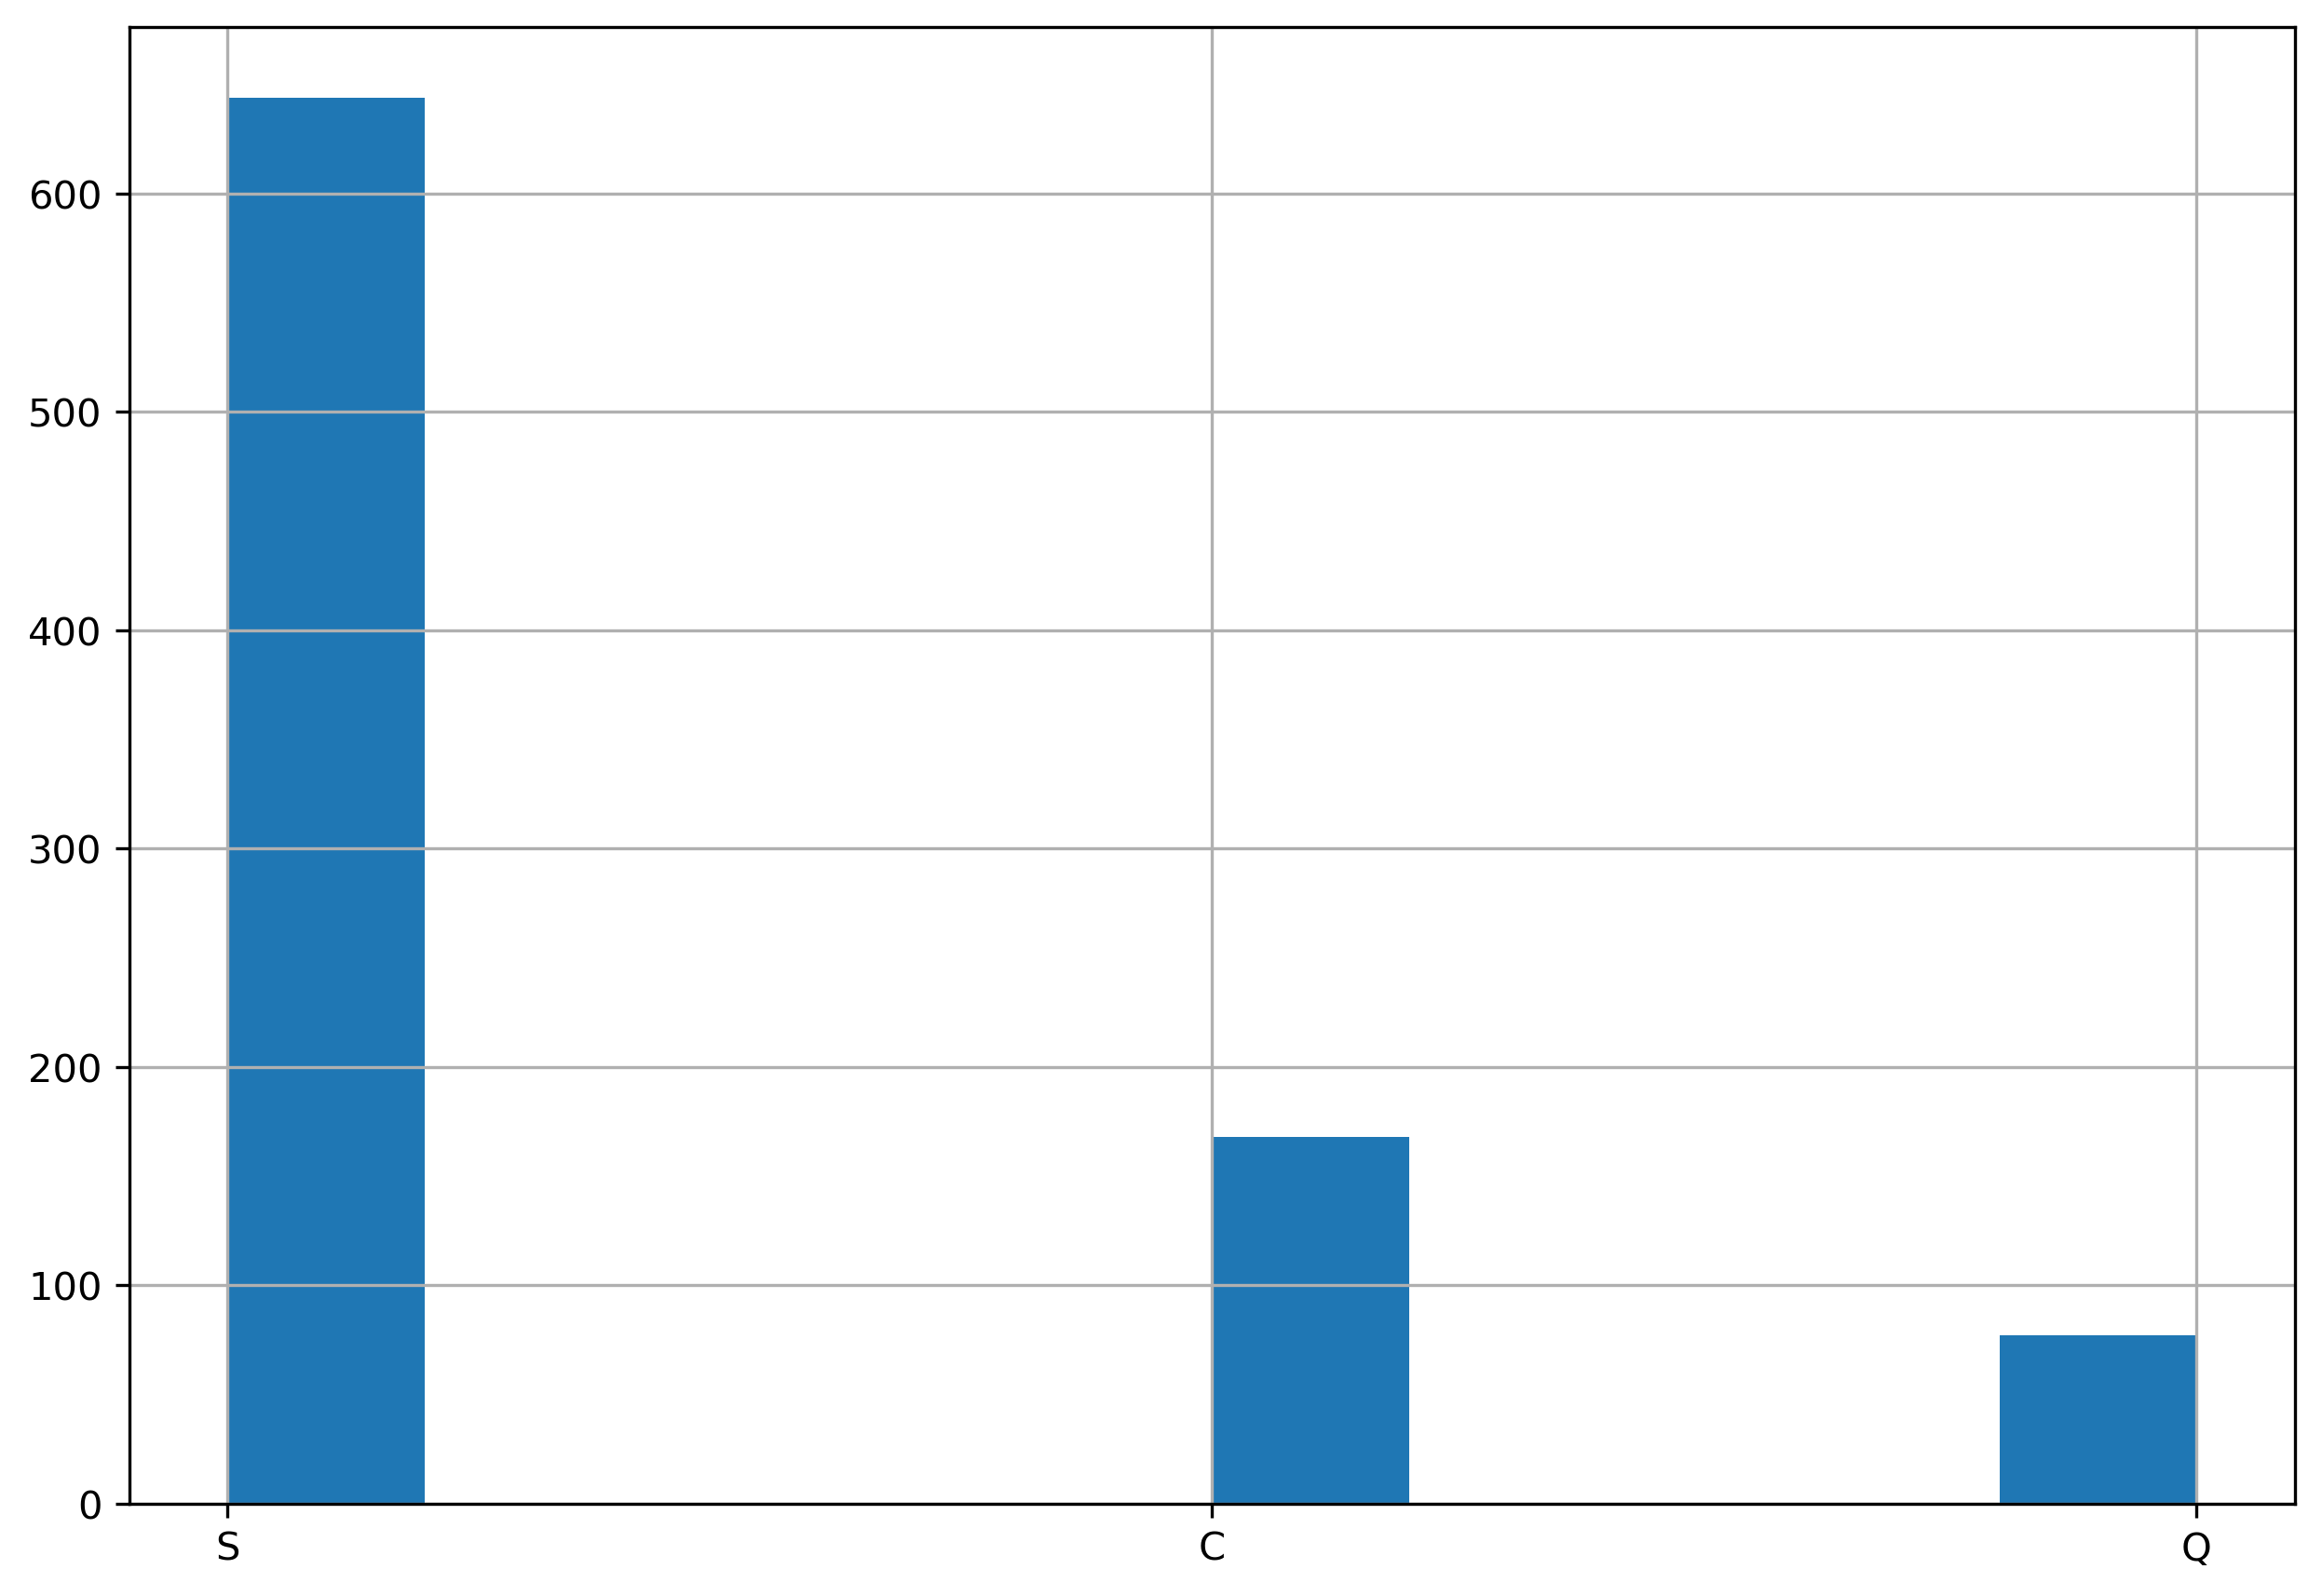

In [132]:
df['Embarked'].hist()
# Seems that most of the embarked column is S followed by C and then Q. We can simply convert this to something more useful.

In [133]:
print(df[df['Embarked'].isnull()])
# since we have missing values, not really sure what to do with this column, since we can't exactly fill in an average. If i 
# recall from a StatQuest video about Trees, you can fill in data with the most likely option based on similar entries. I 
# dont know how to do this so maybe something for future projects. For now need to get something running.
df.drop(columns=['Embarked'],inplace=True)
df.head()

             Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Cabin Embarked
PassengerId                                                                 
62                  1       1    1  38.0      0      0  80.0      1      NaN
830                 1       1    1  62.0      0      0  80.0      1      NaN


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,0
4,1,1,1,35.0,1,0,53.1000,1
5,0,3,0,35.0,0,0,8.0500,0


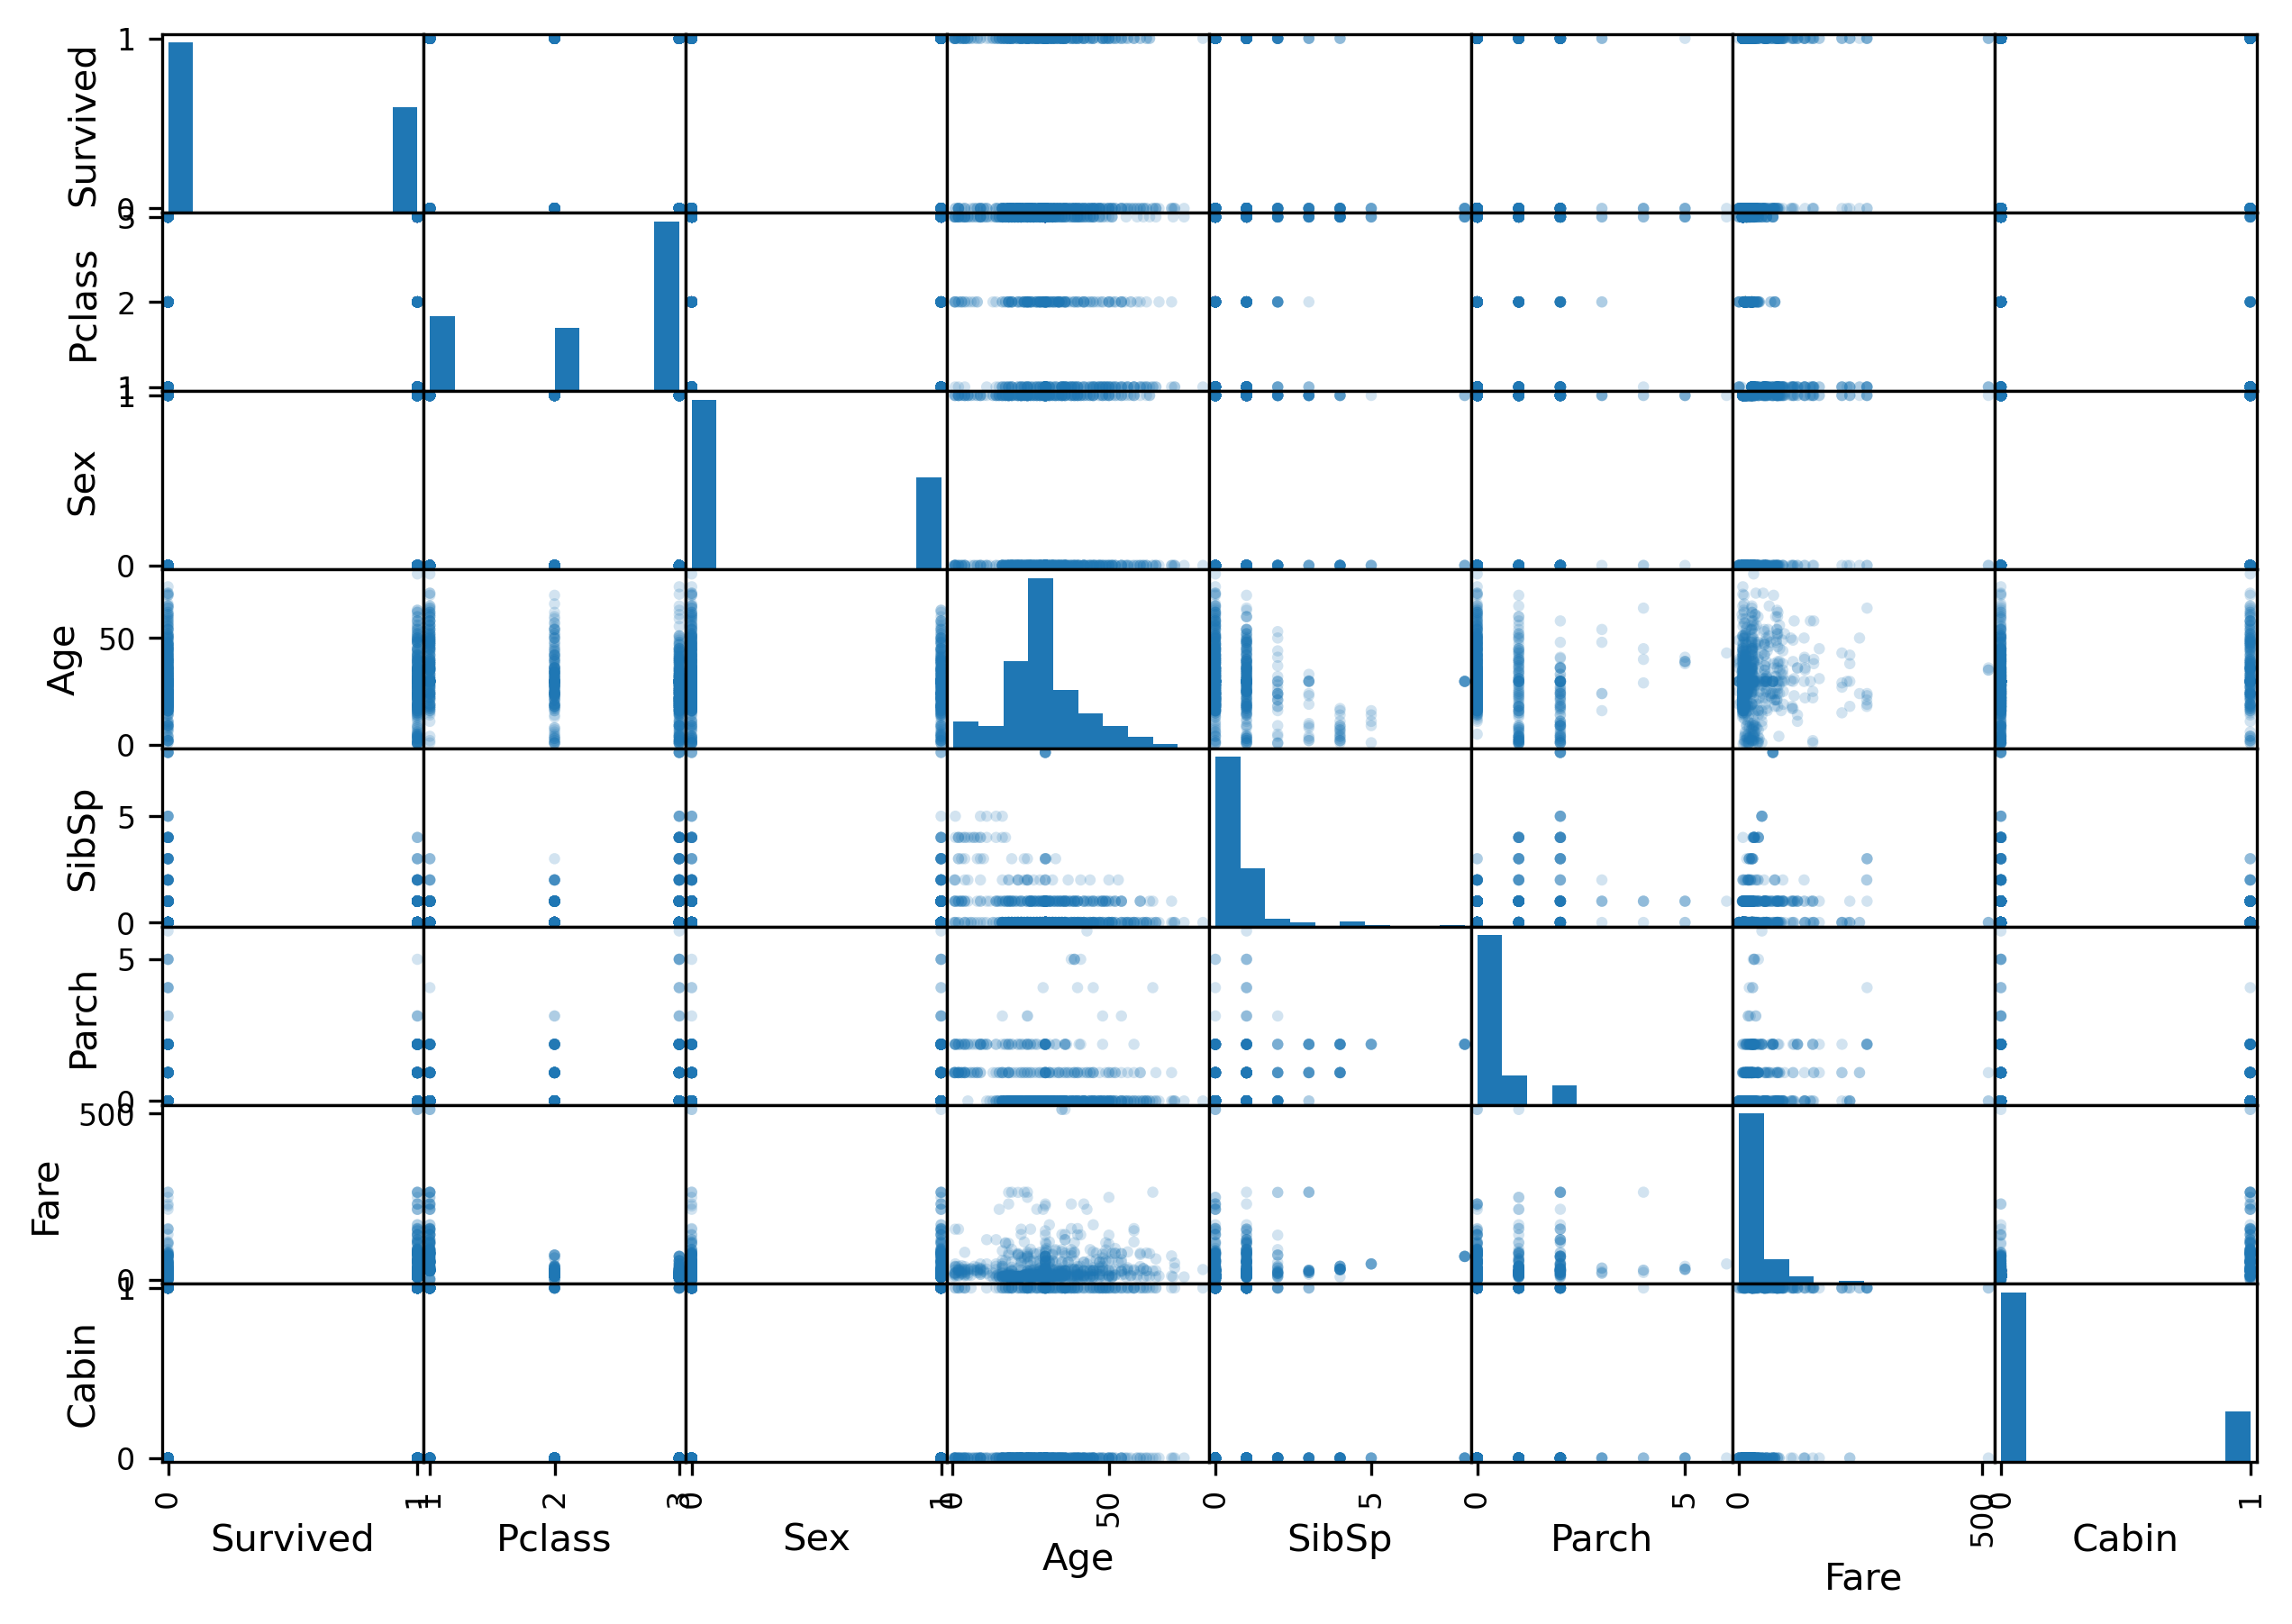

In [134]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2) # using "axes = " here avoids the long output before the plot.

I will stop here. So far have done a bit of exploration, removed unnecessary columns and converted all text columns to numeric forms. I believe we can then encode the categorical columns like p class with preprocessing from sklearn. Also normalizing the data will be done with the next step. Finally, I will likely condense all of this notebook into the next script for the machine learning.

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.2 KB
